# Supply Chain Analysis: Solving Inventory Problems
## Calculating Economic Order Quantity with Back Orders

In [1]:
# Libraries
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

## Describe how allowing back orders affects order quantities
If you've ever gone to a website or a store and ordered an item that wasn't in stock, then you might've been offered the chance to put in a back order. A back order means that a store or a seller is willing to run out of items that customers want. Some people will order and wait, I'm often one of them, where others will go elsewhere and cost you money. And that money might not just be from this particular sale. It could be future sales that you lose. 

So how do you find your total lowest cost? And for this, I'm assuming the lowest cost of ordering guarding against two expenses. The first is the **cost of excess**, and that is your inventory holding cost, and the second is your **cost of being shored**, and that's the loss of revenue by not having an item. If you want to visualize your inventory position with back orders, you can use what's called a **sawtooth diagram**, and I'll add a line for your zero inventory level. So the idea is that you don't place an order until your inventory position is at a particular negative level. In this case, we're assuming minus 20. That's just an assumption though, not a general rule.

<img src="images/backorders.png"/>

## Calculate the Critical Ratio: Shortage Costs vs. Holding Costs

Cs = Cost of shortage

Ce = Inventory cost
$$
Critical Ratio = \frac{Cs}{Cs + Ce}
$$

<img src="images/criticalratio.png"/>

## Calculate economic order quantity with back orders

$$
Q_{bo} = \sqrt{\frac{2 * Setup Cost * Flow Rate}{Holding Cost}} * \sqrt{\frac{Cs + Ce}{Cs}}
$$

In [2]:
# Calculate Qbo

setup_cost = 120.00            # what it costs to place an order
flow_rate = 1800               # the number of units that you expect to order in a year (Demand)
item_cost = 45.00              # the wholesale costs that you pay for each item
inventory_percentage = 0.20    # the percent of an item's value that costs to keep an item on hand for a year

cs = 15     # Cost of Shortage
ce = 9      # Cost of Excess

holding_cost = item_cost * inventory_percentage

eoq = math.sqrt((2 * setup_cost * flow_rate)/(holding_cost))                              # Economic Order Quantity

qbo = math.sqrt((2 * setup_cost * flow_rate)/(holding_cost)) * math.sqrt((cs + ce)/(cs)) # Economic Order Quantity w/ back order

print('EOQ:',round(eoq,2))
print('EOQ with back orders:',round(qbo,2))

EOQ: 219.09
EOQ with back orders: 277.13


We have our EOQ of just over 219 units, rounding up to 220. And we see that we have an EOQ with backorders of 277.13 or 278. With that larger EOQ, it means that we can make fewer orders per year, but it also means that we'll be ordering more items when we do. And that is how the equation balanced out.

### Shortage Cost Effect

In [3]:
shortage_cost = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]) # Shortage Cost
cost_excess = 9        # Cost of Excess
eoqt = math.ceil(eoq)   # EOQ

qboa = eoqt * np.sqrt((shortage_cost + cost_excess)/(shortage_cost)) # EOQconomic Order Quantity w/ back order    

# Create a Data Frame
data3 = {'Shortage Cost': shortage_cost, 
        'EOQ with Backorders': qboa}

shoco = pd.DataFrame(data3)
shoco = shoco.set_index('Shortage Cost')
shoco['EOQ with Backorders'] = shoco['EOQ with Backorders'].round(decimals = 2)
shoco

,EOQ with Backorders
Shortage Cost,
1,695.70
2,515.95
3,440.00
4,396.61
5,368.13
6,347.85
7,332.61
8,320.70
9,311.13


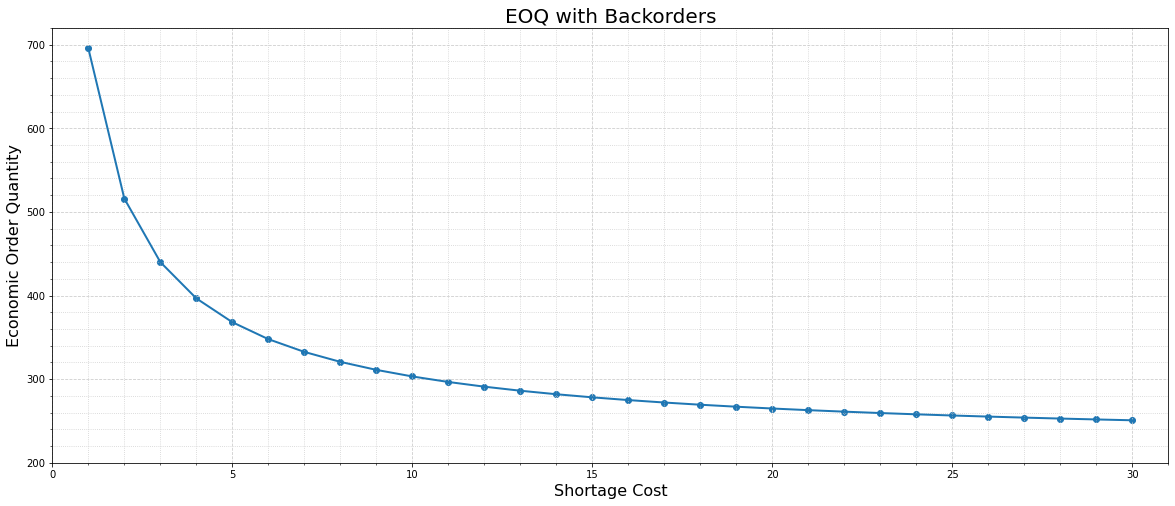

In [4]:
# Plot Graph

fig, ax = plt.subplots(figsize=(20, 8))

# Set axis ranges
ax.set_xlim(0, 31)
ax.set_ylim(200, 720)

# Change major ticks to show every 30/500.
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(100))

# Change minor ticks to show every 10 (30/3 = 10)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# Turn grid on for both major and minor ticks and style minor slightly differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

plt.plot(shortage_cost, qboa, linewidth=2.0)
plt.scatter(shortage_cost, qboa)
plt.xlabel('Shortage Cost', fontsize = 16)               
plt.ylabel('Economic Order Quantity', fontsize = 16)         
plt.title('EOQ with Backorders', fontsize = 20) 
plt.grid(True)
plt.show()

As you can see, if your shortage cost is very low, in this case, I'm assuming $1, then you can save money on ordering by ordering more items, much less frequently. However, as your shortage cost increases, you'll see that the EOQ with backorders decreases, although it tails off after awhile and stops decreasing at the same rate.

## Calculate reorder points for inventory policies that allow back orders

We calculated the economic order quantity for an inventory policy that allows back orders. Now, we will calculate the point at which you should make that order.

How far do we want our inventory level to go into the negative before we reorder? And that is what the reorder point calculation will tell us. Reorder point is often called B star, and it's used to indicate the length of the line below zero, where the reorder point occurs.

$$
b^* = \sqrt{\frac{2 * Setup Cost * Flow Rate}{Holding Cost}} * (1 - \frac{Cs}{Cs + Ce})
$$

In [5]:
print('Setup Cost:',round(setup_cost,2))
print('Inventory Percentage:',round(inventory_percentage,2))
print('Holding Cost:',round(holding_cost,2))
print('EOQ:',round(eoq,2))
print('EOQ with back orders:',round(qbo,2))

Setup Cost: 120.0
Inventory Percentage: 0.2
Holding Cost: 9.0
EOQ: 219.09
EOQ with back orders: 277.13


In [6]:
# Reorder Point
b_star = -1 * qbo * (1 - (cs/(cs+ce)))

print('B-star:',round(b_star,2))

B-star: -103.92


We get a reorder point of 103.923 or about 104. So whenever we have back orders, totaling at least 104 items, we need to place our economic order quantity order of 278 items.

In [7]:
shortage_cost2 = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]) # Shortage Cost
cost_excess = 9        # Cost of Excess
eoqt2 = math.ceil(qbo)   # EOQ with back orders

qbob = -1 * eoqt2 * (1 - (shortage_cost2)/(shortage_cost2 + cost_excess)) # EOQconomic Order Quantity w/ back order    

# Create a Data Frame
data4 = {'Shortage Cost': shortage_cost2, 
        'Reorder Point': qbob}

shoco2 = pd.DataFrame(data4)
shoco2 = shoco2.set_index('Shortage Cost')
shoco2['Reorder Point'] = shoco2['Reorder Point'].round(decimals = 2)
shoco2

,Reorder Point
Shortage Cost,
0,-278.00
1,-250.20
2,-227.45
3,-208.50
4,-192.46
5,-178.71
6,-166.80
7,-156.38
8,-147.18


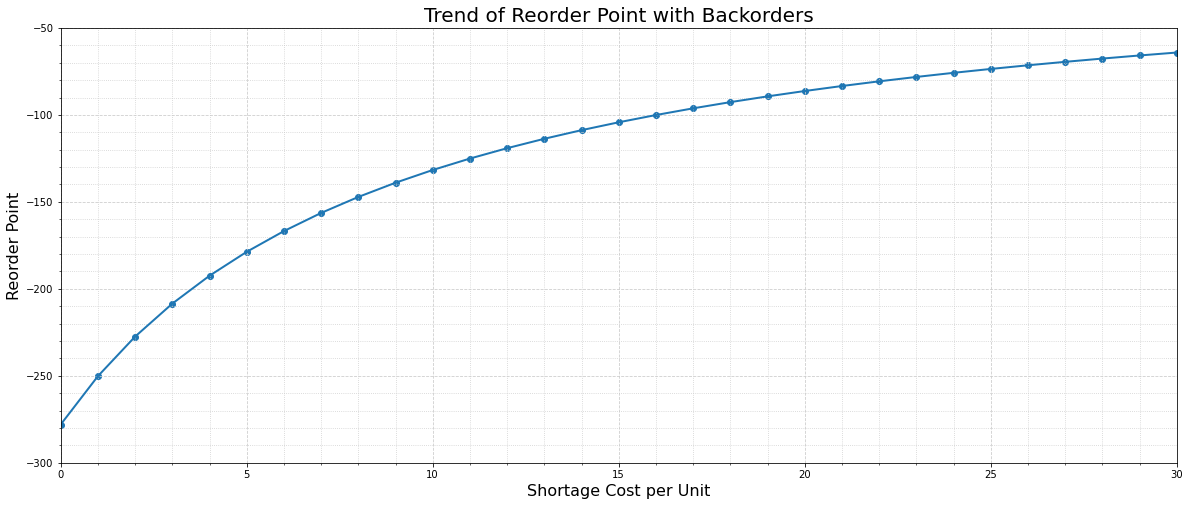

In [8]:
# Plot Graph

fig, ax = plt.subplots(figsize=(20, 8))

# Set axis ranges
ax.set_xlim(0, 30)
ax.set_ylim(-300, -50)

# Change major ticks
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(50))

# Change minor ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# Turn grid on for both major and minor ticks and style minor slightly differently.
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

plt.plot(shortage_cost2, qbob, linewidth=2.0)
plt.scatter(shortage_cost2, qbob)
plt.xlabel('Shortage Cost per Unit', fontsize = 16)               
plt.ylabel('Reorder Point', fontsize = 16)         
plt.title('Trend of Reorder Point with Backorders', fontsize = 20) 
plt.grid(True)
plt.show()

So if your shortage cost zero, then really there's no point in reordering because you're keeping everybody's money, assuming they don't cancel. And as the shortage cost gets higher, then you'll see that your reorder point increases that is comes closer to zero. Although, that increase or coming close to zero slows down over time.